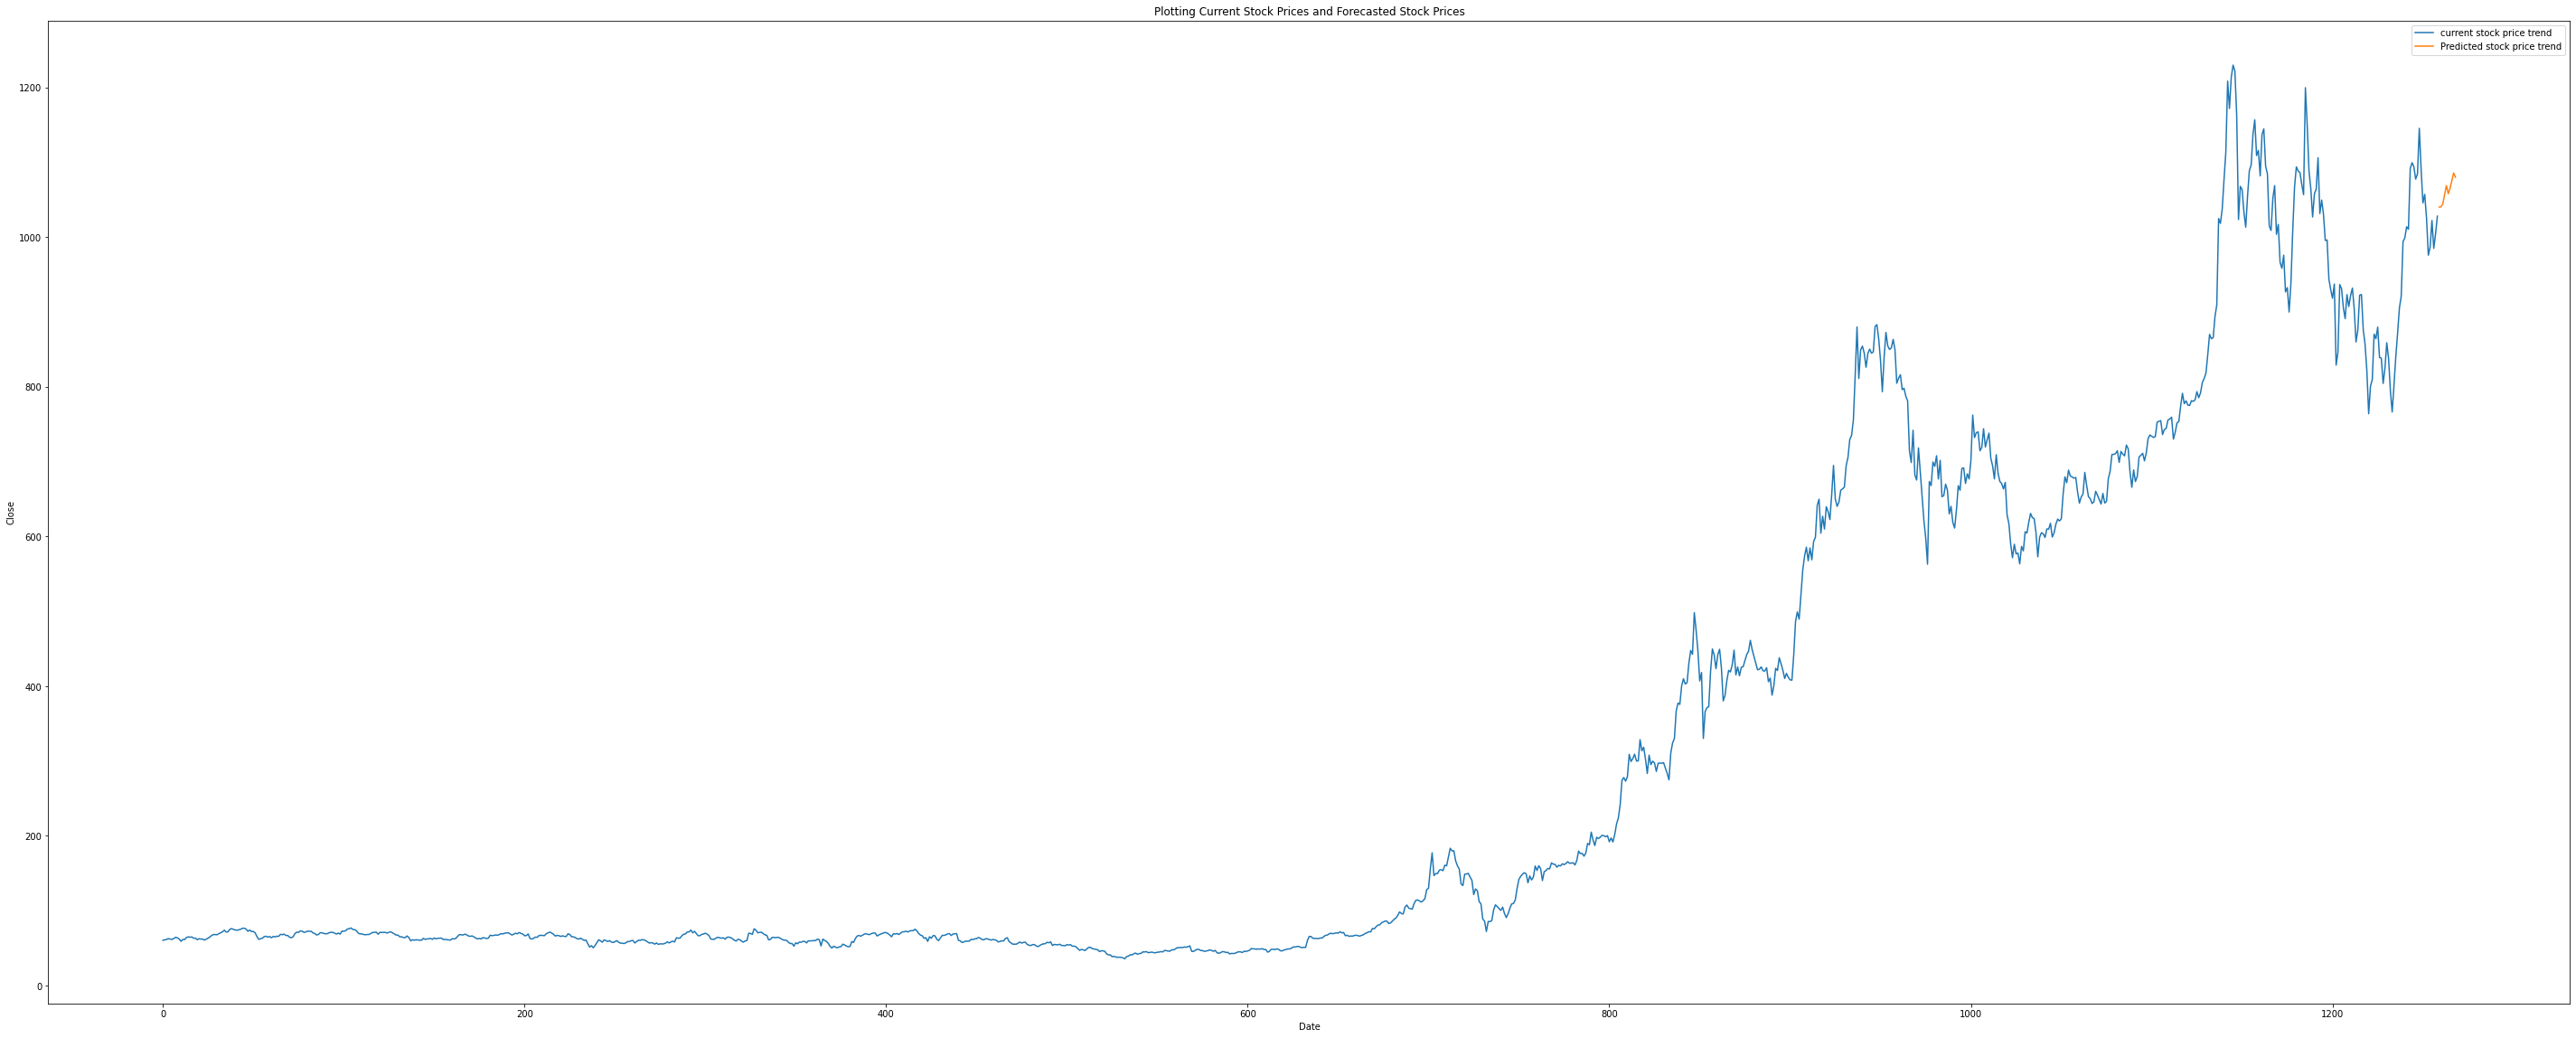

AMOUNT INVESTED IN DOLLARS: $ 1000.0
NUMBER OF STOCKS PURCHASED: 0.9726207038438973
CURRENT STOCK PRICE: $ 1028.150024
FORECASTING FOR 10 DAYS
FORECASTED STOCK PRICE AFTER 10 DAYS : $ 1080.0088689156833
INVESTED AMOUNT AFTER 10 DAYS : $ 1050.4389862424232
PERCENTAGE PROFIT/LOSS AFTER 10 DAYS : 5.04389862424232 %
STATUS AFTER 10 DAYS : Profit


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
np = int(input("Enter the number of days for which you would like to make a forecast. The forecast will  start from April 20th 2022"))
am = float(input("Enter the amount in dollars you would like to invest in the Tesla stocks"))
data = pd.read_csv('data.csv')
arima_model = pickle.load(open("model_arima.pkl", "rb"))
current_stock_price = float(data.iloc[-1]["Close"])
number_of_stocks_purchased = (am/current_stock_price)
pred = arima_model.predict(n_periods = np)
final_stock_price = float(pred[-1])
final_investment_amount = final_stock_price* number_of_stocks_purchased
percentage = ((final_investment_amount - am)/am)*100

if percentage < 0:
    result = "Loss"
elif percentage > 0:
    result = "Profit"
else:
    result = "No Profit or Loss"

lst = []
for i in range(len(data['Close'].tolist())):
         lst.append(i)
close_list = pd.DataFrame(
    {'Date': lst,
     'Close': data['Close'].tolist(),
    })
close_list = close_list.set_index('Date')
plst = []
for i in range(len(pred)):
         plst.append(len(lst)+i)
pred_list = pd.DataFrame(
    {'Date': plst,
     'Close': pred,
    })
pred_list = pred_list.set_index('Date')

plt.rcParams['figure.figsize'] = [50, 20]
plt.plot(close_list, label ='current stock price trend')
plt.plot(pred_list, label='Predicted stock price trend')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Plotting Current Stock Prices and Forecasted Stock Prices')
plt.legend()
plt.show()

print("AMOUNT INVESTED IN DOLLARS: $", am)
print("NUMBER OF STOCKS PURCHASED:",number_of_stocks_purchased )
print("CURRENT STOCK PRICE: $",current_stock_price)
print("FORECASTING FOR {0} DAYS".format(np))
print("FORECASTED STOCK PRICE AFTER {0} DAYS : $ {1}".format(np,final_stock_price))
print("INVESTED AMOUNT AFTER {0} DAYS : $ {1}".format(np,final_investment_amount))
print("PERCENTAGE PROFIT/LOSS AFTER {0} DAYS : {1} %".format(np,percentage))
print("STATUS AFTER {0} DAYS : {1}".format(np,result))